In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
import glob
from pathlib import Path
import re
from skimage import color, exposure
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [44]:
pd.set_option('display.max_columns', None)

In [29]:
df = pd.read_csv('final_train.csv',index_col='Unnamed: 0')

In [30]:
df.shape

(11086, 572)

In [31]:
df[['Activity', 'void()']].sample(10)

,Activity,void()
10440,WALKING_UPSTAIRS,1.0
425,LAYING,3.0
6072,LAYING,3.0
865,LAYING,1.0
279,STANDING,2.0
5970,WALKING_UPSTAIRS,2.0
7609,SITTING,2.0
8748,WALKING_DOWNSTAIRS,3.0
548,WALKING_DOWNSTAIRS,3.0
7364,WALKING_UPSTAIRS,2.0


In [32]:
df['Activity'].value_counts()

LAYING                2167
SITTING               2019
STANDING              1979
WALKING               1900
WALKING_UPSTAIRS      1633
WALKING_DOWNSTAIRS    1388
Name: Activity, dtype: int64

In [33]:
df['Activity'].unique()

array(['STANDING', 'WALKING_UPSTAIRS', 'LAYING', 'WALKING', 'SITTING',
       'WALKING_DOWNSTAIRS'], dtype=object)

In [34]:
df['void()']

0        1.0
1        2.0
2        3.0
3        2.0
4        3.0
        ... 
11081    2.0
11082    1.0
11083    1.0
11084    3.0
11085    1.0
Name: void(), Length: 11086, dtype: float64

In [35]:
df

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,LAYING,-1.548333,-0.139628,-2.380889,NaN,0.067613,-0.887342,6.007361,-11.970485,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11081,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,3.534816,-0.544652,2.0
11082,LAYING,-1.550288,-0.231565,-2.376561,-1.868524,0.007653,-0.077020,5.494466,-5.860692,3.603169,...,5.048737,2.923856,5.182026,-0.998495,2.853755,-0.933561,-1.000173,-1.984575,1.372763,1.0
11083,WALKING_UPSTAIRS,-1.569815,-0.794940,-2.482325,-1.784151,0.021844,-0.740329,8.005261,-11.916107,2.644861,...,4.453514,4.302852,2.979961,-6.032382,1.853029,-0.802817,0.041975,3.427548,-0.075184,1.0
11084,WALKING_DOWNSTAIRS,-1.574768,-0.752847,-2.449529,-1.737755,-0.189761,-0.454246,8.054443,-5.611277,2.473134,...,4.615939,4.443277,3.208597,-6.200222,1.675269,-0.828934,-0.877004,3.385405,-0.383217,3.0


In [36]:
tab = []
for it in df.index:
    tab.append(df.loc[it].isna().sum().sum())
#     print(it, df.loc[it].isna().sum().sum())

In [37]:
np.unique(np.array(tab), return_counts=True)

(array([ 0,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40], dtype=int64),
 array([9624,    1,   37,   54,   40,   39,   40,   32,   42,   51,   42,
          41,   35,   41,   41,   37,   37,   42,   39,   31,   42,   43,
          44,   39,   33,   41,   48,   43,   42,   35,   49,   53,   55,
          54,   43,   37,   31,    8], dtype=int64))

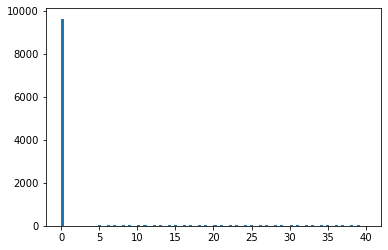

In [38]:
plt.hist(tab, bins=100);

In [48]:
df['Liczba bledow']=tab
df1 = df[df['Liczba bledow']<=5]

In [49]:
for col in df1.columns:
    # print(col, df1[col].dtypes)
    if(df1[col].dtypes != object):
        df1[col] = df1[col].fillna((df[col].mean()))

<ipython-input-49-15b21a398839>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].fillna((df[col].mean()))


In [50]:
for col in df1.columns:
    # print(col, df1[col].dtypes)
    if(df1[col].dtypes == 'float64'):
        df1[col] = df1[col].astype('float32')

<ipython-input-50-8fb11c14850f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].astype('float32')


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9662 entries, 0 to 11085
Columns: 573 entries, Activity to Liczba bledow
dtypes: float32(570), int64(2), object(1)
memory usage: 21.3+ MB


In [52]:
df1.isna().sum().sum()

0

In [53]:
del df1['Liczba bledow']
df1.drop_duplicates(inplace = True)


<ipython-input-53-f37884baf17d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace = True)


In [54]:

df1 = df1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [55]:
df1.shape

(9551, 572)

In [56]:
df1.to_csv('df_bezNAN.csv')